In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!pip install ipdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install torch-geometric
!pip install tensorboardX
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!pip install pgmpy

In [4]:
!git clone https://github.com/YANI-ALT/FML-GNN_DisagreementProblem.git

Cloning into 'FML-GNN_DisagreementProblem'...
remote: Enumerating objects: 15685, done.
remote: Counting objects: 100% (15685/15685), done.
remote: Compressing objects: 100% (639/639), done.
remote: Total 15685 (delta 15040), reused 15633 (delta 15006), pack-reused 0
Receiving objects: 100% (15685/15685), 38.52 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (15040/15040), done.
Checking out files: 100% (25267/25267), done.


In [5]:
cd FML-GNN_DisagreementProblem/GNNModels/

/content/FML-GNN_DisagreementProblem/GNNModels


In [6]:
cd GraphXAI-main/

[Errno 2] No such file or directory: 'GraphXAI-main/'
/content/FML-GNN_DisagreementProblem/GNNModels


In [9]:
cd FML-GNN_DisagreementProblem/GraphXAI-main/

/content/FML-GNN_DisagreementProblem/GraphXAI-main


In [10]:
pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/FML-GNN_DisagreementProblem/GraphXAI-main
  Running setup.py develop for graphxai


In [11]:
cd ../GNNModels

/content/FML-GNN_DisagreementProblem/GNNModels


In [12]:
#Notebook starts from here

In [64]:
import torch
from Models import *
from Train import *
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.datasets import TUDataset
import matplotlib.pyplot as plt

In [72]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [66]:
pwd

'/content/FML-GNN_DisagreementProblem/GraphXAI-main'

In [68]:
cd ../GNNModels/

/content/FML-GNN_DisagreementProblem/GNNModels


In [69]:
ls

checkpoints/  dataset_info/    Models.py     README.md  Tutorial1.ipynb
data/         environment.yml  __pycache__/  Train.py   Tutorial2.ipynb


In [ ]:
model = get_model_pretrained(model_name='GCN_3L',dataset_name='MUTAG')

In [ ]:
# model = GCN_3L(hidden_channels=64,num_features=dataset.num_node_features,num_classes=dataset.num_classes)

# # params={'lr':0.01,'epochs':10,'verbose':True,'save_wts':''}
# params={'lr':0.01,'epochs':50,'verbose':True,'save_wts':'checkpoints/GCN_3L_PROTEINS_epochs=300.pt'}

# TrainModel(model,dataset,params,type='GC')

In [73]:
cd ../GraphXAI-main/

/content/FML-GNN_DisagreementProblem/GraphXAI-main


In [89]:
model

GCN_3L(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)

In [182]:
from graphxai.explainers import GNNExplainer, IntegratedGradExplainer, PGExplainer, CAM, PGMExplainer, GradCAM

In [93]:
# gnex = GNNExplainer(model)

# gnex_ne = gnex.get_explanation_graph(dataset[0].x, dataset[0].edge_index, forward_kwargs={'batch':None})

In [110]:
# imp_nodes = []
# for i, j in enumerate(gnex_ne.node_imp.numpy()):
#   if int(j) == 1:
#     imp_nodes.append(i)

In [ ]:
# imp_nodes

In [ ]:
# for i, j in enumerate(gnex_ne.node_imp):
#   imp_nodes = []
#   if j == 1:
#     print(i)


In [ ]:
# imp_nodes

Build Explainers

In [183]:
gnex = GNNExplainer(model)
igex = IntegratedGradExplainer(model, criterion=torch.nn.CrossEntropyLoss())
pgex = PGExplainer(model, emb_layer_name = 'conv3',  max_epochs = 100, lr = 0.01, explain_graph=True)
pgex.train_explanation_model(dataset, forward_kwargs={'batch':None})
cam = CAM(model)
Gradcam = GradCAM(model)
pgm = PGMExplainer(model, explain_graph=True)

100%|██████████| 188/188 [00:01<00:00, 146.34it/s]


Epoch: 0 | Loss: 79.8709045946598


100%|██████████| 188/188 [00:01<00:00, 144.90it/s]


Epoch: 1 | Loss: 78.35432553291321


100%|██████████| 188/188 [00:01<00:00, 149.47it/s]


Epoch: 2 | Loss: 76.28993667662144


100%|██████████| 188/188 [00:01<00:00, 146.41it/s]


Epoch: 3 | Loss: 73.08956757187843


100%|██████████| 188/188 [00:01<00:00, 149.74it/s]

Epoch: 4 | Loss: 69.33531138300896


In [260]:
pgex = PGExplainer(model, emb_layer_name = 'conv3',  max_epochs = 500, lr = 0.01, explain_graph=True)
pgex.train_explanation_model(dataset, forward_kwargs={'batch':None})


100%|██████████| 188/188 [00:01<00:00, 120.69it/s]


Epoch: 0 | Loss: 79.91317941248417


100%|██████████| 188/188 [00:01<00:00, 119.39it/s]


Epoch: 1 | Loss: 78.73310048878193


100%|██████████| 188/188 [00:01<00:00, 118.57it/s]


Epoch: 2 | Loss: 77.89188818633556


100%|██████████| 188/188 [00:01<00:00, 119.79it/s]


Epoch: 3 | Loss: 76.70401300489902


100%|██████████| 188/188 [00:01<00:00, 118.29it/s]


Epoch: 4 | Loss: 75.51367771625519


100%|██████████| 188/188 [00:01<00:00, 121.42it/s]


Epoch: 5 | Loss: 73.9127544015646


100%|██████████| 188/188 [00:01<00:00, 118.18it/s]


Epoch: 6 | Loss: 72.44115928560495


100%|██████████| 188/188 [00:01<00:00, 118.04it/s]


Epoch: 7 | Loss: 70.44808375835419


100%|██████████| 188/188 [00:01<00:00, 117.92it/s]


Epoch: 8 | Loss: 68.62718968838453


100%|██████████| 188/188 [00:01<00:00, 120.64it/s]


Epoch: 9 | Loss: 66.64607119560242


100%|██████████| 188/188 [00:01<00:00, 119.56it/s]


Epoch: 10 | Loss: 64.7011294066906


100%|██████████| 188/188 [00:01<00:00, 119.61it/s]


Epoch: 11 | Loss: 62.643802262842655


100%|██████████| 188/188 [00:01<00:00, 119.63it/s]


Epoch: 12 | Loss: 60.82962926104665


100%|██████████| 188/188 [00:01<00:00, 119.19it/s]


Epoch: 13 | Loss: 59.05107090622187


100%|██████████| 188/188 [00:01<00:00, 116.39it/s]


Epoch: 14 | Loss: 57.39017188176513


100%|██████████| 188/188 [00:01<00:00, 119.60it/s]


Epoch: 15 | Loss: 55.854313280433416


100%|██████████| 188/188 [00:01<00:00, 119.80it/s]


Epoch: 16 | Loss: 54.41507160663605


100%|██████████| 188/188 [00:01<00:00, 117.50it/s]


Epoch: 17 | Loss: 53.11161882430315


100%|██████████| 188/188 [00:01<00:00, 119.63it/s]


Epoch: 18 | Loss: 52.0239880271256


100%|██████████| 188/188 [00:01<00:00, 120.09it/s]


Epoch: 19 | Loss: 50.94560993462801


100%|██████████| 188/188 [00:01<00:00, 115.66it/s]


Epoch: 20 | Loss: 49.84537417255342


100%|██████████| 188/188 [00:01<00:00, 118.82it/s]


Epoch: 21 | Loss: 49.03604235127568


100%|██████████| 188/188 [00:01<00:00, 118.98it/s]


Epoch: 22 | Loss: 48.11835088208318


100%|██████████| 188/188 [00:01<00:00, 118.82it/s]


Epoch: 23 | Loss: 47.4459624607116


100%|██████████| 188/188 [00:01<00:00, 100.50it/s]


Epoch: 24 | Loss: 46.6625767853111


100%|██████████| 188/188 [00:02<00:00, 79.01it/s]


Epoch: 25 | Loss: 46.06047986075282


100%|██████████| 188/188 [00:02<00:00, 81.99it/s] 


Epoch: 26 | Loss: 45.5630446979776


100%|██████████| 188/188 [00:01<00:00, 119.46it/s]


Epoch: 27 | Loss: 45.06372169777751


100%|██████████| 188/188 [00:01<00:00, 118.76it/s]


Epoch: 28 | Loss: 44.667890089564025


100%|██████████| 188/188 [00:01<00:00, 117.78it/s]


Epoch: 29 | Loss: 44.34163256408647


100%|██████████| 188/188 [00:01<00:00, 119.14it/s]


Epoch: 30 | Loss: 44.04844379471615


100%|██████████| 188/188 [00:01<00:00, 118.46it/s]


Epoch: 31 | Loss: 43.81891401205212


100%|██████████| 188/188 [00:01<00:00, 114.95it/s]


Epoch: 32 | Loss: 43.62950256373733


100%|██████████| 188/188 [00:01<00:00, 119.86it/s]


Epoch: 33 | Loss: 43.466451346408576


100%|██████████| 188/188 [00:01<00:00, 119.37it/s]


Epoch: 34 | Loss: 43.33992178272456


100%|██████████| 188/188 [00:01<00:00, 118.93it/s]


Epoch: 35 | Loss: 43.23364974791184


100%|██████████| 188/188 [00:01<00:00, 120.52it/s]


Epoch: 36 | Loss: 43.1455657936167


100%|██████████| 188/188 [00:01<00:00, 120.02it/s]


Epoch: 37 | Loss: 43.076379826059565


100%|██████████| 188/188 [00:01<00:00, 116.72it/s]


Epoch: 38 | Loss: 43.01628540107049


100%|██████████| 188/188 [00:01<00:00, 117.77it/s]


Epoch: 39 | Loss: 42.97318275622092


100%|██████████| 188/188 [00:01<00:00, 119.01it/s]


Epoch: 40 | Loss: 42.93636987381615


100%|██████████| 188/188 [00:01<00:00, 120.12it/s]


Epoch: 41 | Loss: 42.90222976333462


100%|██████████| 188/188 [00:01<00:00, 117.87it/s]


Epoch: 42 | Loss: 42.87545112124644


100%|██████████| 188/188 [00:01<00:00, 117.50it/s]


Epoch: 43 | Loss: 42.85077502275817


100%|██████████| 188/188 [00:01<00:00, 115.57it/s]


Epoch: 44 | Loss: 42.834886639378965


100%|██████████| 188/188 [00:01<00:00, 118.14it/s]


Epoch: 45 | Loss: 42.818851503077894


100%|██████████| 188/188 [00:01<00:00, 118.95it/s]


Epoch: 46 | Loss: 42.80586020019837


100%|██████████| 188/188 [00:01<00:00, 120.19it/s]


Epoch: 47 | Loss: 42.79554335656576


100%|██████████| 188/188 [00:01<00:00, 119.30it/s]


Epoch: 48 | Loss: 42.78595118736848


100%|██████████| 188/188 [00:01<00:00, 117.65it/s]


Epoch: 49 | Loss: 42.77818826562725


100%|██████████| 188/188 [00:01<00:00, 117.90it/s]


Epoch: 50 | Loss: 42.77152064582333


100%|██████████| 188/188 [00:01<00:00, 116.68it/s]


Epoch: 51 | Loss: 42.764747688081115


100%|██████████| 188/188 [00:01<00:00, 118.87it/s]


Epoch: 52 | Loss: 42.75999227212742


100%|██████████| 188/188 [00:01<00:00, 117.87it/s]


Epoch: 53 | Loss: 42.75506359292194


100%|██████████| 188/188 [00:01<00:00, 119.47it/s]


Epoch: 54 | Loss: 42.75108466343954


100%|██████████| 188/188 [00:01<00:00, 118.00it/s]


Epoch: 55 | Loss: 42.748102417215705


100%|██████████| 188/188 [00:01<00:00, 118.32it/s]


Epoch: 56 | Loss: 42.74468472437002


100%|██████████| 188/188 [00:01<00:00, 116.01it/s]


Epoch: 57 | Loss: 42.741502745077014


100%|██████████| 188/188 [00:01<00:00, 119.12it/s]


Epoch: 58 | Loss: 42.73941777157597


100%|██████████| 188/188 [00:01<00:00, 118.82it/s]


Epoch: 59 | Loss: 42.7374270404689


100%|██████████| 188/188 [00:01<00:00, 119.32it/s]


Epoch: 60 | Loss: 42.73499073321


100%|██████████| 188/188 [00:01<00:00, 120.16it/s]


Epoch: 61 | Loss: 42.733826571144164


100%|██████████| 188/188 [00:01<00:00, 117.32it/s]


Epoch: 62 | Loss: 42.731525763636455


100%|██████████| 188/188 [00:01<00:00, 114.48it/s]


Epoch: 63 | Loss: 42.729976827511564


100%|██████████| 188/188 [00:01<00:00, 116.75it/s]


Epoch: 64 | Loss: 42.728962790220976


100%|██████████| 188/188 [00:01<00:00, 118.28it/s]


Epoch: 65 | Loss: 42.72726983646862


100%|██████████| 188/188 [00:01<00:00, 119.67it/s]

Epoch: 66 | Loss: 42.72665520920418


In [258]:
pgex_ne = pgex.get_explanation_graph(dataset[3].x, dataset[3].edge_index, forward_kwargs={'batch':None})


In [259]:
pgex_ne.node_imp

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.])

In [236]:
# Gradcam_ne = Gradcam.get_explanation_graph(dataset[3].x, dataset[3].edge_index, forward_kwargs={'batch':None})

In [241]:
# torch.sigmoid(Gradcam_ne.node_imp)

In [242]:
# cam_ne = cam.get_explanation_graph(dataset[2].x, dataset[2].edge_index, forward_kwargs={'batch':None})

In [243]:
# dataset[2].num_nodes

In [244]:
# torch.sigmoid(cam_ne.node_imp) 

In [245]:
# torch.sigmoid(cam_ne.node_imp)

In [250]:
def gnn_imp_nodes(dataset_idx):
  
  gnex_ne = gnex.get_explanation_graph(dataset[dataset_idx].x, dataset[dataset_idx].edge_index, forward_kwargs={'batch':None})

  imp_nodes = []
  for i, j in enumerate(gnex_ne.node_imp.numpy()):
    if int(j) == 1:
      imp_nodes.append(i)
  return imp_nodes

def pge_imp_nodes(dataset_idx):

    pgex_ne = pgex.get_explanation_graph(dataset[dataset_idx].x, dataset[dataset_idx].edge_index, forward_kwargs={'batch':None})

    imp_nodes = []

    for i, j in enumerate(pgex_ne.node_imp.numpy()):
      if int(j) == 1:
        imp_nodes.append(i)
    return imp_nodes

def cam_imp_nodes(dataset_idx):

    cam_ne = cam.get_explanation_graph(dataset[dataset_idx].x, dataset[dataset_idx].edge_index, forward_kwargs={'batch':None})

    imp_nodes = []

    cam_ne_norm = torch.sigmoid(cam_ne.node_imp)

    for i, j in enumerate(cam_ne_norm.numpy()):
      if j > 0.5:
        imp_nodes.append(i)
    return imp_nodes

def Gradcam_imp_nodes(dataset_idx):

    Gradcam_ne = Gradcam.get_explanation_graph(dataset[dataset_idx].x, dataset[dataset_idx].edge_index, forward_kwargs={'batch':None})

    imp_nodes = []

    Gradcam_ne_norm = torch.sigmoid(Gradcam_ne.node_imp)

    for i, j in enumerate(Gradcam_ne_norm.numpy()):
      if j > 0.5:
        imp_nodes.append(i)
    return imp_nodes

def ig_imp_nodes(dataset_idx):

    igex_ne = igex.get_explanation_graph(dataset[dataset_idx].edge_index, dataset[dataset_idx].x, dataset[dataset_idx].y, forward_kwargs={'batch':None})
    imp_nodes = []

    igex_ne_norm = torch.sigmoid(igex_ne.node_imp)

    for i, j in enumerate(igex_ne_norm.detach().numpy()):
      if j > 0.5:
        imp_nodes.append(i)
    return imp_nodes

def pgm_imp_nodes(dataset_idx):
  import numpy as np
  np.random.seed(1998)
  pgm_ne = pgm.get_explanation_graph(dataset[dataset_idx].x, dataset[dataset_idx].edge_index, forward_kwargs={'batch':None})

  imp_nodes = []
  for i, j in enumerate(pgm_ne.node_imp.numpy()):
    if j == 1:
      imp_nodes.append(i)
  return imp_nodes

In [251]:
# igex = IntegratedGradExplainer(model, criterion=torch.nn.CrossEntropyLoss())
# igex_ne = igex.get_explanation_graph(dataset[5].edge_index, dataset[5].x, dataset[5].y, forward_kwargs={'batch':None})

In [252]:
# torch.sigmoid(igex_ne.node_imp)

Get The Important Nodes

In [ ]:
imp_nodes_ig = {}
imp_nodes_gnn = {}
imp_nodes_pge = {}
imp_nodes_pgm = {}
imp_nodes_cam = {}
imp_nodes_Gradcam = {}

num_datasets = len(dataset)

for i in range(num_datasets):
  imp_nodes_gnn[i] = gnn_imp_nodes(i)
  imp_nodes_pge[i] = pge_imp_nodes(i)
  imp_nodes_cam[i] = cam_imp_nodes(i)
  imp_nodes_pgm[i] = pgm_imp_nodes(i)
  imp_nodes_ig[i] = ig_imp_nodes(i)
  imp_nodes_Gradcam[i] = Gradcam_imp_nodes(i)

Metrics Calculation

In [238]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection

    if union == 0:
        return float(1)
        
    return float(intersection) / union

In [239]:
import numpy as np
n_methods = 6

jacard = np.zeros((n_methods, n_methods))

count = 0
for k in imp_nodes_ig.keys():

    count += 1

    jacard[0, 1] += jaccard(imp_nodes_ig[k], imp_nodes_gnn[k])
    jacard[0, 2] += jaccard(imp_nodes_ig[k], imp_nodes_pge[k])
    jacard[0, 3] += jaccard(imp_nodes_ig[k], imp_nodes_cam[k])
    jacard[0, 4] += jaccard(imp_nodes_ig[k], imp_nodes_pgm[k])
    jacard[0, 5] += jaccard(imp_nodes_ig[k], imp_nodes_Gradcam[k])

    jacard[1, 2] += jaccard(imp_nodes_gnn[k], imp_nodes_pge[k])
    jacard[1, 3] += jaccard(imp_nodes_gnn[k], imp_nodes_cam[k])
    jacard[1, 4] += jaccard(imp_nodes_gnn[k], imp_nodes_pgm[k])
    jacard[1, 5] += jaccard(imp_nodes_gnn[k], imp_nodes_Gradcam[k])


    jacard[2, 3] += jaccard(imp_nodes_pge[k], imp_nodes_cam[k])
    jacard[2, 4] += jaccard(imp_nodes_pge[k], imp_nodes_pgm[k])
    jacard[2, 5] += jaccard(imp_nodes_pge[k], imp_nodes_Gradcam[k])

    jacard[3, 4] += jaccard(imp_nodes_cam[k], imp_nodes_pgm[k])
    jacard[3, 5] += jaccard(imp_nodes_cam[k], imp_nodes_Gradcam[k])

    jacard[4, 5] += jaccard(imp_nodes_pgm[k], imp_nodes_Gradcam[k])


jacard = (jacard + jacard.T)/(count)

for i in range(n_methods):

    jacard[i,i] = 1
    

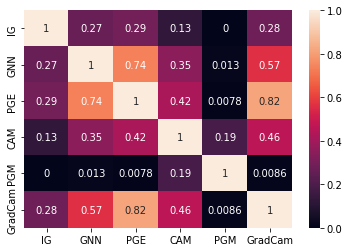

In [240]:
import seaborn as sns
import pandas as pd
labels = ["IG", "GNN", "PGE", "CAM", "PGM", "GradCam"]
jacard_df = pd.DataFrame(jacard, index = labels, columns = labels)
sns.heatmap(jacard_df, annot=True)

In [ ]:
# gnex_ne.edge_imp

In [190]:
# igex = IntegratedGradExplainer(model, criterion=torch.nn.CrossEntropyLoss())
# igex_ne = igex.get_explanation_graph(dataset[5].edge_index, dataset[5].x, dataset[5].y, forward_kwargs={'batch':None})

In [ ]:
# torch.sigmoid(igex_ne.node_imp).numpy()

In [80]:
# igex_ne.edge_imp

In [54]:
# pgex = PGExplainer(model, emb_layer_name = 'conv2',  max_epochs = 5, lr = 0.01, explain_graph=True)

In [ ]:
# pgex.train_explanation_model(dataset, forward_kwargs={'batch':None})

In [51]:
# pgex_ne = pgex.get_explanation_graph(dataset[5].x, dataset[5].edge_index, forward_kwargs={'batch':None})

In [ ]:
# pgex_ne.node_imp

In [ ]:
# pgex_ne.edge_imp

In [57]:
# cam = CAM(model)

In [59]:
# cam_ne = cam.get_explanation_graph(dataset[5].x, dataset[5].edge_index, forward_kwargs={'batch':None})

In [ ]:
# cam_ne.node_imp

In [213]:
# pgm = PGMExplainer(model, explain_graph=True)

In [214]:
# pgm_ne = pgm.get_explanation_graph(dataset[20].x, dataset[20].edge_index, forward_kwargs={'batch':None})

In [ ]:
# pgm_ne.node_imp

In [ ]:
# def gnn_imp_nodes(node_idx, data):

#     node_exp = gnnexp.get_explanation_node(node_idx = node_idx, x = data.x, edge_index = data.edge_index)

#     imp_nodes = []

#     for k in node_exp.node_reference.keys():

#         if node_exp.node_imp[node_exp.node_reference[k]].item() == 1:

#             imp_nodes.append(k)

#     return imp_nodes

In [ ]:
# imp_nodes_ig = {}
# imp_nodes_gnn = {}
# imp_nodes_pge = {}
# imp_nodes_pgm = {}
# imp_nodes_cam = {}

# for node_idx in tqdm((data.test_mask == True).nonzero()):

#     if out[node_idx].argmax() != data.y[node_idx]:
#         continue

#     imp_nodes_ig[node_idx] = ig_imp_nodes(node_idx)
#     imp_nodes_gnn[node_idx] = gnn_imp_nodes(node_idx)
#     imp_nodes_pge[node_idx] = pge_imp_nodes(node_idx)
#     imp_nodes_pgm[node_idx] = pgm_imp_nodes(node_idx.item())
#     imp_nodes_cam[node_idx] = cam_imp_nodes(node_idx)